<a href="https://colab.research.google.com/github/shakuntala2ooo/ML-assignment1/blob/main/ml_assignmnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

In [ ]:
trip_data = pd.read_csv('sampledata.csv')
trip_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
trip_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [ ]:
trip_data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install xgboost


In [ ]:
!pip install statsmodels

In [ ]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from statsmodels.tsa.arima_model import ARIMA
from tensorflow import keras
from tensorflow.keras import layers
from flask import Flask, request, jsonify
import joblib

In [ ]:
!pip install flask

In [ ]:
X = trip_data.iloc[:,:-1]
y = trip_data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

In [ ]:
lr_predictions = lr_model.predict(X_test)

In [ ]:
print("Train Score:",lr_model.score(X_train,y_train))

In [ ]:
xgb_model = XGBRegressor()

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
xgb_predictions = xgb_model.predict(X_test)

In [ ]:
print(trip_data.columns)

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')


In [ ]:
arima_model = ARIMA(trip_data['demand'], order=(5, 1, 0))

In [ ]:
arima_model_fit = arima_model.fit(disp=0)

In [ ]:
arima_predictions = arima_model_fit.forecast(steps=len(y_test))[0]

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(layers.Dense(64, activation='relu', input_dim=len(X_train.columns)))

In [ ]:
model.add(layers.Dense(32, activation='relu'))

In [ ]:
model.add(layers.Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

In [ ]:
dnn_predictions = model.predict(X_test)

<Axes: >

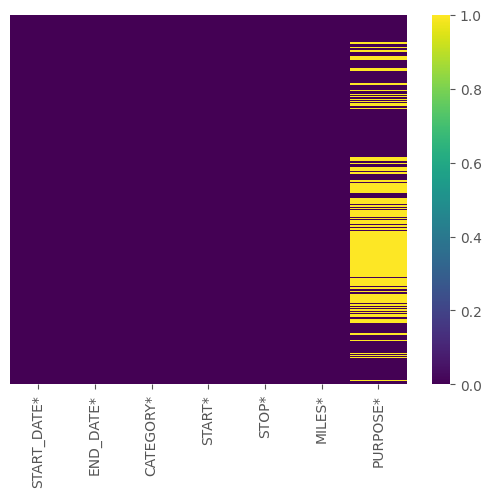

In [ ]:
sns.heatmap(trip_data.isnull(), yticklabels=False, cmap = "viridis")

<Axes: >

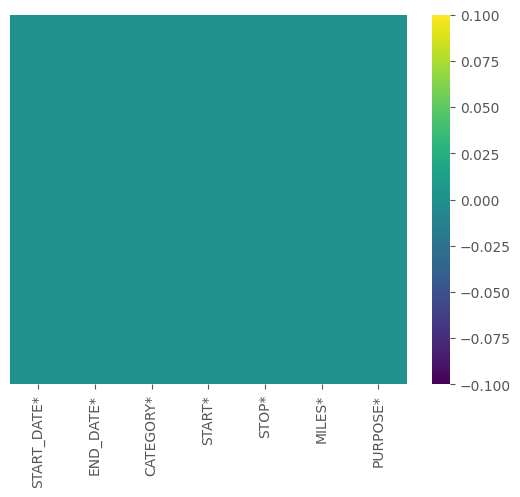

In [ ]:
trip_data = trip_data.dropna()
sns.heatmap(trip_data.isnull(),yticklabels=False, cmap="viridis")


In [ ]:
trip_data['START_DATE*'] = pd.to_datetime(trip_data['START_DATE*'], format="%m/%d/%Y %H:%M" )
trip_data['END_DATE*'] = pd.to_datetime(trip_data['END_DATE*'], format="%m/%d/%Y %H:%M")


<ipython-input-26-f4fe8ecd3dbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['START_DATE*'] = pd.to_datetime(trip_data['START_DATE*'], format="%m/%d/%Y %H:%M" )
<ipython-input-26-f4fe8ecd3dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['END_DATE*'] = pd.to_datetime(trip_data['END_DATE*'], format="%m/%d/%Y %H:%M")


In [ ]:
min=[]
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in trip_data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    trip_data['MIN']=min
trip_data['HOUR'] = hour
trip_data['DAY'] = day
trip_data['DAY_OF_WEEK'] = dayofweek
trip_data['MONTH'] = month
trip_data['WEEKDAY'] = weekday

<ipython-input-27-a475df707be1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['HOUR'] = hour
<ipython-input-27-a475df707be1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['DAY'] = day
<ipython-input-27-a475df707be1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [ ]:
trip_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [ ]:
time=[]
trip_data['TRAVELLING_TIME'] = trip_data['END_DATE*'] - trip_data['START_DATE*']
for i in trip_data['TRAVELLING_TIME']:
    time.append(i.seconds/60)
trip_data['TRAVELLING_TIME'] = time
trip_data.head()

<ipython-input-29-6b11df43dc0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['TRAVELLING_TIME'] = trip_data['END_DATE*'] - trip_data['START_DATE*']
<ipython-input-29-6b11df43dc0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['TRAVELLING_TIME'] = time


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


In [ ]:
trip_data['TRAVELLING_TIME'] = trip_data['TRAVELLING_TIME']/60
trip_data['SPEED'] = trip_data['MILES*']/trip_data['TRAVELLING_TIME']
trip_data.head()

<ipython-input-30-4fe64265081b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['TRAVELLING_TIME'] = trip_data['TRAVELLING_TIME']/60
<ipython-input-30-4fe64265081b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_data['SPEED'] = trip_data['MILES*']/trip_data['TRAVELLING_TIME']


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY,TRAVELLING_TIME,SPEED
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,0.100000,51.000000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,0.216667,22.153846
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,0.233333,20.142857
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,1.116667,57.044776
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,0.066667,64.500000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.countplot(trip_data['CATEGORY*'])

<Axes: ylabel='Frequency'>

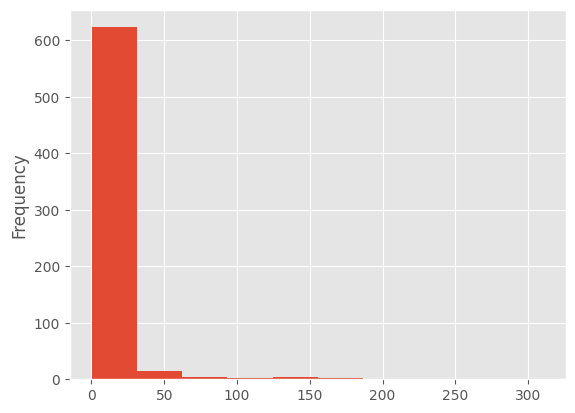

In [ ]:
trip_data['MILES*'].plot.hist()


In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(trip_data['PURPOSE'])
ax.set_title("Trips for Purpose", fontsize = 20)
plt.xlabel("PURPOSE",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(trip_data['MIN'])
ax.set_title("Trips per min of the day", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

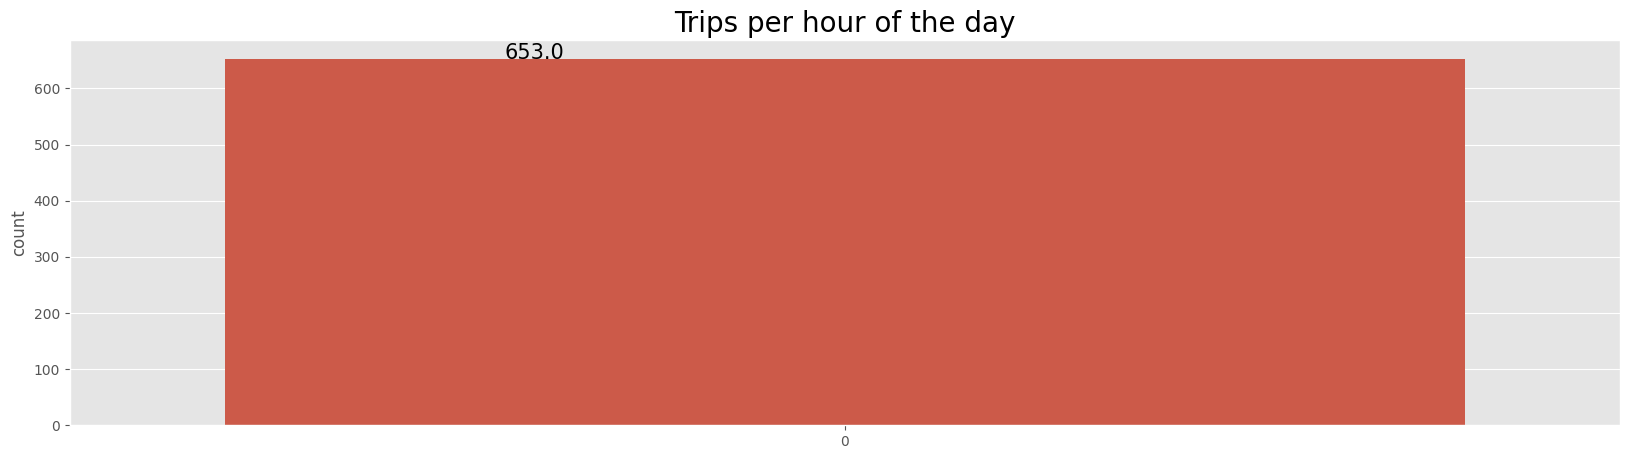

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(trip_data['HOUR'])
ax.set_title("Trips per hour of the day", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

In [ ]:
plt.figure(figsize = (20,5))
ax=sns.countplot(trip_data['WEEKDAY'])
ax.set_title("Trips per day of a week", fontsize = 20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")

<Axes: >

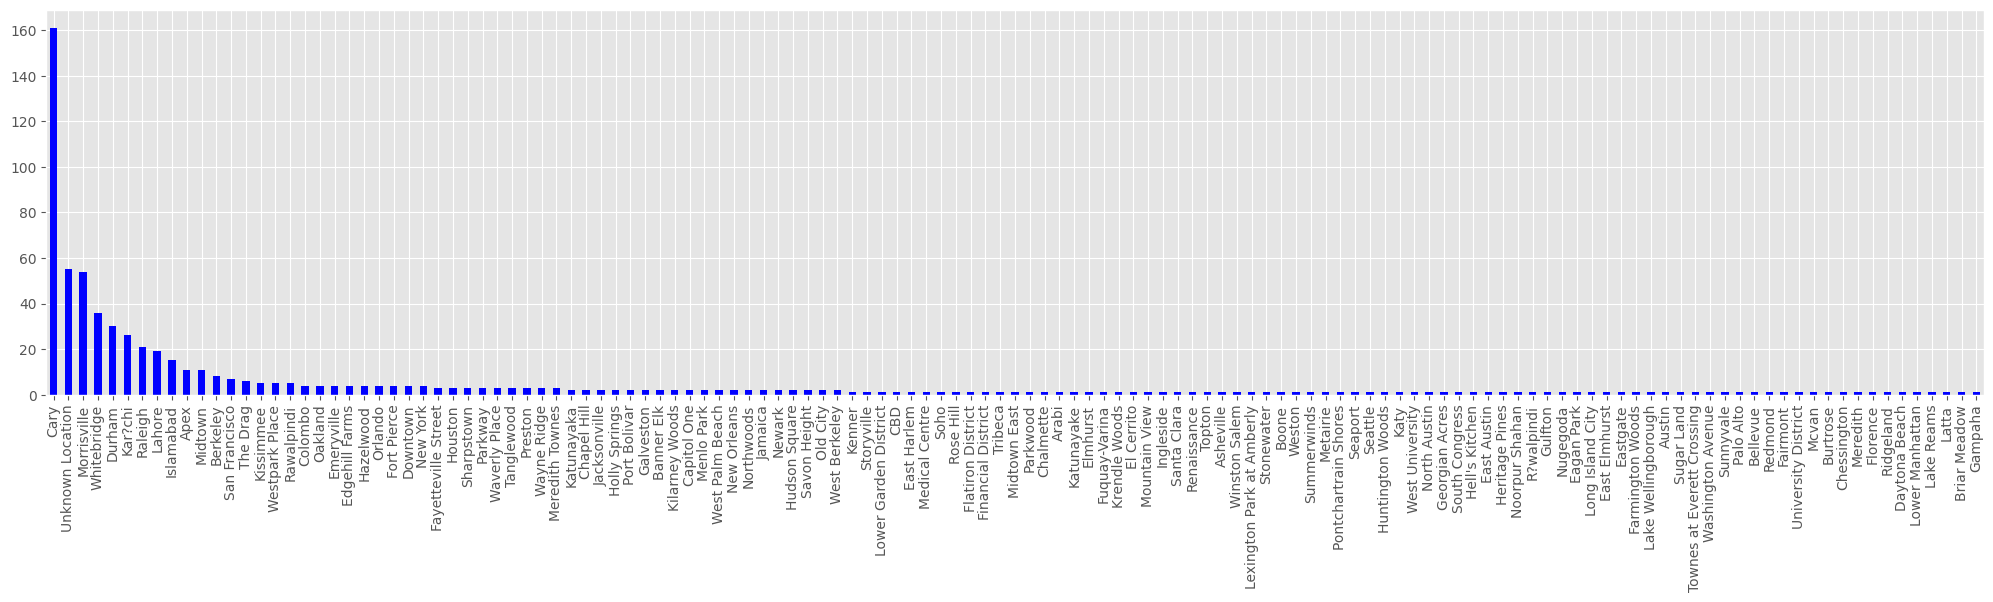

In [ ]:
trip_data['START*'].value_counts().plot(kind = 'bar', figsize = (25,5), color = 'blue')